In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statistics import *
import collections
plt.style.use('Solarize_Light2') # Функция для задания стиля графикам

In [2]:
data = pd.read_excel('data1.xlsx', sheet_name = '1') # читаем из файла все выборки 
data # выводим их

,first,second,third,fourth,fifth,sixth,seventh
0,1.478837,3.524742,10.688410,8.762075,-0.639073,7,5
1,1.001225,0.704558,13.948562,8.406540,1.338411,4,7
2,12.442777,9.485070,11.323363,6.717878,11.860927,3,3
3,7.258455,4.063322,6.812343,9.374129,4.627152,4,12
4,2.847905,2.474827,13.001960,6.004247,3.497351,7,9
...,...,...,...,...,...,...,...
495,12.652488,5.980685,11.551907,15.599527,0.413245,3,16
496,3.017953,5.027926,1.647249,6.883272,16.401325,3,12
497,15.229314,7.827465,6.470981,4.492946,5.352318,3,12
498,7.899367,1.921087,10.150870,6.701511,7.854305,4,8


1, 2, 3, 4 - нормальные распределения (Среднее ~ медиана; Эксцесс и ассиметрия ~ 0; На гистограмме вид нормального распределения)

    1 - m = 5  s = 7.1

    2 - m = 5.8  s = 5

    3 - m = 7.1  s = 5.1

    4 - m = 6.8  s = 3.1

5 - равномерное расределение (Эксцесс ~ 1,2 ассиметрия ~ 0; Мат ожидание ~ (min+max)/2; Дисперсия ~ (max-min)^2 / 2)

    a = -3.960927; b = 17.665563

6 - Пуассоновское распределение (мат. ожидание ~ дисперсии, дискретная выборка)

    k = 13   lamda = 5

7 - Биномиальное (исключительно по гистограмме)

# Задание 1

Хи-квадрат тест:
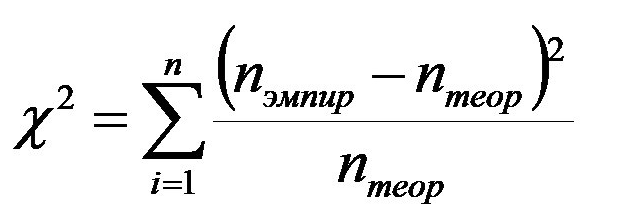

Колмагоров-смиирнов:
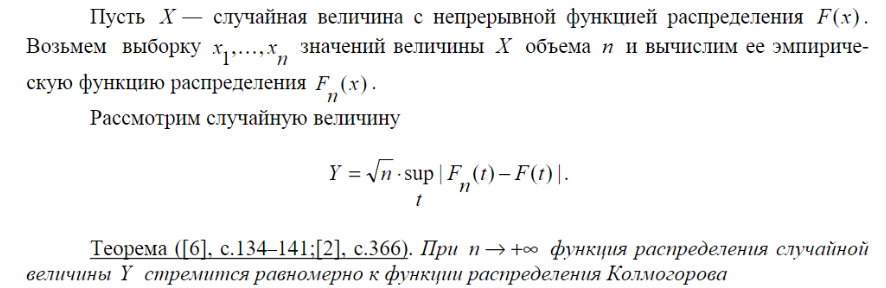

In [3]:
names = list(data)
num_bins = 10  # Количество интервалов для дискретизации
norm = names[0:4]
p_values = []
np.random.seed(16)
for name in norm:
    normal = np.random.normal(loc=mean(data[name].values), scale=stdev(data[name].values), size=100000)
    expected, bins = np.histogram(normal, bins=num_bins)
    observed, bins1 = np.histogram(data[name], bins=bins)
    observed = np.array(observed)

    statistic, p_value = stats.chisquare(observed, expected/200)
    p_values.append(p_value)
# p_values

In [4]:
observed, bins = np.histogram(data['fifth'], bins=15)
statistic, p_value = stats.chisquare(observed)
p_values.append(p_value)
# p_values

In [5]:
pois = stats.poisson.rvs (mu=5, size=500)
expected, bins = np.histogram(pois, bins=num_bins)
observed, bins1 = np.histogram(data['sixth'], bins=bins)
statistic, p_value = stats.chisquare(observed, expected)
p_values.append(p_value)
# p_values

In [6]:
binom = np.random.normal(loc=mean(data['seventh'].values), scale=2.419775, size=10000)
expected, bins = np.histogram(binom, bins=15)
observed, bins = np.histogram(data['seventh'], bins=bins)
statistic, p_value = stats.chisquare(observed, expected/20)
p_values.append(p_value)
# p_values

In [7]:
ks_values = np.zeros(7)
val = data['fifth']
val = (val - val.min()) / (val.max() - val.min())
a,p = stats.kstest(val, 'uniform')
ks_values[4] = p

In [8]:
i = 0
for name in norm:
    mu = mean(data[name])
    sigma = stdev(data[name])
    a,p = stats.kstest((data[name] - mu) / sigma, 'norm')
    ks_values[i] = p
    i+=1
# list(ks_values)

In [9]:
table = {'Chi-Squared test':[], 'KS test':[]}
columns = ['Chi-Squared test', 'KS test']
for i in range(len(p_values)):
    table[columns[0]].append(p_values[i])
    table[columns[1]].append(list(ks_values)[i])
# table

In [10]:
first_table = pd.DataFrame(table)
first_table.reset_index()
# for i in range(0,len(names)):
#     print(names[i])
#     first_table.rename(index = {int(i):names[i]})
first_table.rename(index = {5:names[5],
0:names[0],
2:names[2],
1:names[1],
3:names[3],
4:names[4],
6:names[6]})

,Chi-Squared test,KS test
first,7.954352e-01,0.988026
second,3.043057e-01,0.527676
third,2.410201e-03,0.690383
fourth,7.879929e-01,0.705422
fifth,5.982722e-01,0.498155
sixth,7.044510e-02,0.000000
seventh,1.328774e-24,0.000000


Для дискретных выборок по определению КС тест не применяется, как и Хи-квадрат, что видно по получившимся значениям, в остальном p_value соответствует уровню значимости 0,05, следовательно можно считать, что распределения соответсвуют предсказанным.

# Задание 2

In [11]:
table_second = {'variable': [], 'T-test pvalue': [], 'ttest accepted': []}
for col in data.columns:
    mu = data[col].mean()
    res_ttest = stats.ttest_1samp(data[col], round(mu))
    table_second['variable'].append(col)
    table_second['T-test pvalue'].append(res_ttest.pvalue)
    table_second['ttest accepted'].append((res_ttest.pvalue > 0.05))
    # print(res_ttest)
    # print()

In [12]:
second_table = pd.DataFrame(table_second)
second_table = second_table.set_index('variable')
second_table

,T-test pvalue,ttest accepted
variable,,
first,0.989667,True
second,0.272667,True
third,0.567034,True
fourth,0.104883,True
fifth,0.472152,True
sixth,0.825747,True
seventh,0.853448,True


Можно сделать вывод, что можно использовать округлённое значение среднего как мат. ожидание, чем больше округление и размер округления превышает стандартную ошибку, целесобразность такого решения резко падает.

# Задание 3

In [13]:
def fischersnedekortest(value1, value2):
    statistic = (np.std(value1, ddof=1) / np.std(value2,ddof=1))**2
    pvalue = stats.f.sf(statistic, len(value1) - 1, len(value2) - 1)
    return {'statistic':statistic, 'pvalue':pvalue}

In [16]:
table_third = {'pairs of variables': [], 'T-test pvalue': [], 'ttest accepted': [], 'Fisher-Snedekor pvalue': [], 'fisher accepted': []}

for i in range(len(norm)):
    for j in range(i + 1, len(norm)):
        res_ttest = stats.ttest_ind(data[norm[i]], data[norm[j]])
        res_fisher = fischersnedekortest(data[norm[i]], data[norm[j]])
        table_third['pairs of variables'].append(f'{norm[i]}, {norm[j]}')
        table_third['T-test pvalue'].append(res_ttest.pvalue)
        table_third['ttest accepted'].append((res_ttest.pvalue > 0.05))
        table_third['Fisher-Snedekor pvalue'].append(res_fisher['pvalue'])
        table_third['fisher accepted'].append((res_fisher['pvalue'] > 0.05))
        # print(f'{norm[i]}, {norm[j]}: {res_ttest}')
        # print(f'{norm[i]}, {norm[j]}: {res_fisher}')
        # print()

In [17]:
third_table = pd.DataFrame(table_third)
third_table = third_table.set_index('pairs of variables')
third_table

,T-test pvalue,ttest accepted,Fisher-Snedekor pvalue,fisher accepted
pairs of variables,,,,
"first, second",5.188850e-02,True,3.061430e-15,False
"first, third",6.082389e-08,False,1.953677e-14,False
"first, fourth",3.298373e-07,False,2.269340e-72,False
"second, third",1.718630e-05,False,5.965407e-01,True
"second, fourth",1.005526e-04,False,1.127562e-27,False
"third, fourth",1.840315e-01,True,8.851187e-29,False


# Задание 4

In [20]:
table_fourth = {'pairs of variables': [], 'Kolmogorov-Smirnov pvalue': [], 'ks accepted': [], 'Mann-Whitney pvalue': [], 'mw accepted': [], 'Wilcoxon pvalue': [], 'w accepted': []}

for i in range(len(norm)):
    for j in range(i + 1, len(norm)):
        res_ks = stats.ks_2samp(data[norm[i]], data[norm[j]])
        res_mw = stats.mannwhitneyu(data[norm[i]], data[norm[j]])
        res_w = stats.wilcoxon(data[norm[i]], data[norm[j]])
        table_fourth['pairs of variables'].append(f'{norm[i]}, {norm[j]}')

        table_fourth['Kolmogorov-Smirnov pvalue'].append(res_ks.pvalue)
        table_fourth['ks accepted'].append((res_ks.pvalue > 0.05))

        table_fourth['Mann-Whitney pvalue'].append(res_mw.pvalue)
        table_fourth['mw accepted'].append((res_mw.pvalue > 0.05))

        table_fourth['Wilcoxon pvalue'].append(res_w.pvalue)
        table_fourth['w accepted'].append((res_w.pvalue > 0.05))

        print(f'{norm[i]}, {norm[j]}: {res_ks}')
        print(f'{norm[i]}, {norm[j]}: {res_mw}')
        print(f'{norm[i]}, {norm[j]}: {res_w}')
        print()

first, second: KstestResult(statistic=0.13, pvalue=0.00042124348957333854, statistic_location=-1.581362868018914, statistic_sign=1)
first, second: MannwhitneyuResult(statistic=117295.0, pvalue=0.09157873156906797)
first, second: WilcoxonResult(statistic=56157.0, pvalue=0.045388596698339174)

first, third: KstestResult(statistic=0.21, pvalue=4.602215863108133e-10, statistic_location=3.0179529757151613, statistic_sign=1)
first, third: MannwhitneyuResult(statistic=101293.0, pvalue=2.0889921599986946e-07)
first, third: WilcoxonResult(statistic=45343.0, pvalue=8.961553759900692e-08)

first, fourth: KstestResult(statistic=0.296, pvalue=1.0169749397308431e-19, statistic_location=2.424367847997928, statistic_sign=1)
first, fourth: MannwhitneyuResult(statistic=101874.0, pvalue=4.105238329304692e-07)
first, fourth: WilcoxonResult(statistic=46954.0, pvalue=1.2458045062714203e-06)

second, third: KstestResult(statistic=0.14, pvalue=0.00010844915031869944, statistic_location=4.063321982044727, stat

In [21]:
fourth_table = pd.DataFrame(table_fourth)
fourth_table = fourth_table.set_index('pairs of variables')
fourth_table

,Kolmogorov-Smirnov pvalue,ks accepted,Mann-Whitney pvalue,mw accepted,Wilcoxon pvalue,w accepted
pairs of variables,,,,,,
"first, second",4.212435e-04,False,9.157873e-02,True,4.538860e-02,False
"first, third",4.602216e-10,False,2.088992e-07,False,8.961554e-08,False
"first, fourth",1.016975e-19,False,4.105238e-07,False,1.245805e-06,False
"second, third",1.084492e-04,False,1.182467e-05,False,9.770043e-06,False
"second, fourth",4.602216e-10,False,6.396515e-06,False,6.453782e-05,False
"third, fourth",1.975130e-06,False,4.065150e-01,True,3.568846e-01,True
